<a href="https://colab.research.google.com/github/tu-ru-tunc/PVLubimova/blob/main/1_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D1%8B_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Лабораторная работа 1

Saving images.jpg to images (11).jpg


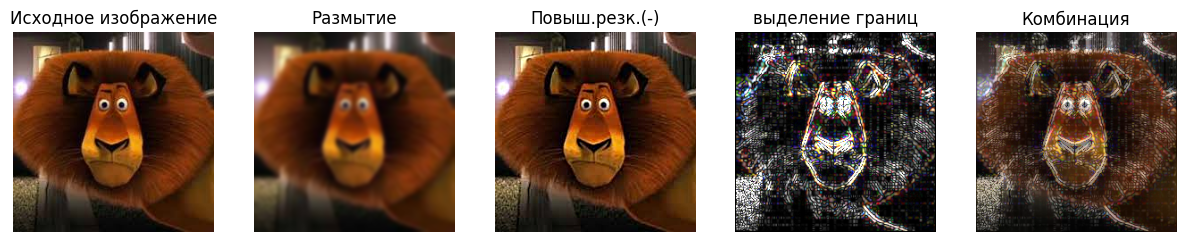

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Функция для загрузки изображения
uploaded = files.upload()

# Получаем имя загруженного файла
image_path = next(iter(uploaded))

# Читаем загруженное изображение
image = cv2.imread(image_path)

# Функция отображения изображений
def show_images(titles, images):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


# Преобразуем изображение из BGR (формат OpenCV) в RGB (формат для Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#операция матричной свертки (расмызия с ядром 5*5)
blurred_image = cv2.GaussianBlur(image_rgb, (11, 11), 0)

#повышение резкости
kernel = np.array([[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])
sharpened = cv2.filter2D(image_rgb, -1, kernel)

#повышение резкости(вычитание)
sharpened_2 = cv2.addWeighted(image_rgb, 1.5, blurred_image, -0.5, 0)

#выделение границ
edges = cv2.Sobel(image_rgb, cv2.CV_64F, 1, 1, ksize=5)
edges = cv2.convertScaleAbs(edges)

#комбинирование
combined = cv2.addWeighted(sharpened_2, 0.5, edges, 0.5, 0)
# Выводим результаты
titles = ['Исходное изображение', 'Размытие', 'Повыш.резк.(-)','выделение границ', 'Комбинация']
images = [image_rgb, blurred_image, sharpened_2, edges, combined]

show_images(titles, images)
